# Cafe Sales Prediction

In [808]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
df = pd.read_csv('/content/dirty_cafe_sales.csv')
df.head(100)


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
95,TXN_8268061,Salad,3,5.0,15.0,ERROR,Takeaway,2023-08-20
96,TXN_5220895,Salad,5,5.0,25.0,Cash,In-store,2023-06-10
97,TXN_3085509,Coffee,4,2.0,8.0,Digital Wallet,In-store,2023-04-15
98,TXN_9999113,Juice,4,3.0,12.0,Cash,Takeaway,2023-05-27


## Data Preprocessing and EDA



In [809]:
import numpy as np
df.replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)

In [810]:
df.columns = df.columns.str.replace(' ', '_')

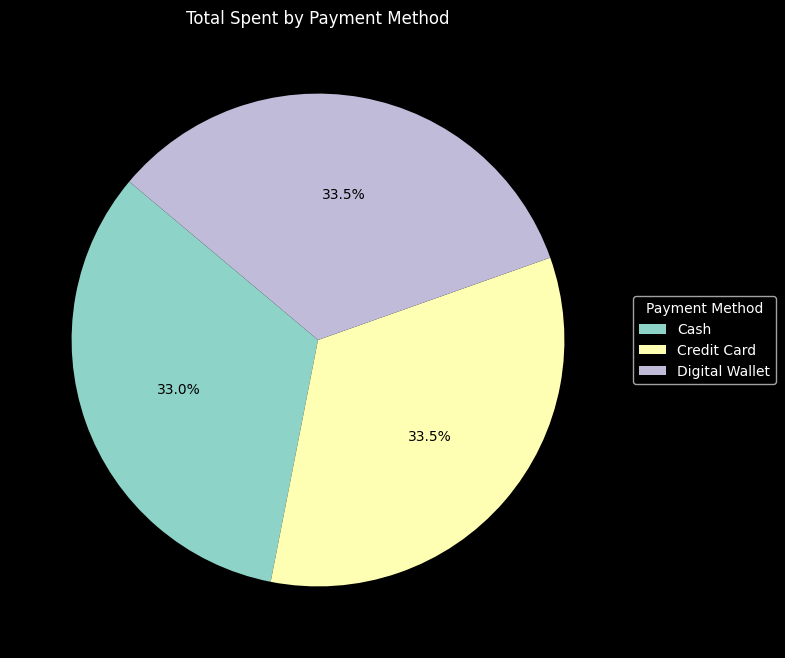

In [811]:
df_copy = df.copy()
df_copy['Total_Spent'] = pd.to_numeric(df_copy['Total_Spent'], errors='coerce')
df_copy.dropna(subset=['Payment_Method', 'Total_Spent'], inplace=True)
payment_method_totals = df_copy.groupby('Payment_Method')['Total_Spent'].sum()
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(payment_method_totals, labels=payment_method_totals.index, autopct='%1.1f%%', startangle=140, textprops={'color': 'black'})
plt.title('Total Spent by Payment Method')
plt.legend(wedges, payment_method_totals.index, title="Payment Method", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

After analyzing the distribution of the Payment Method feature, we observe that the total spending is almost evenly divided among the three methods **(approximately 33%, 33.5%, and 33.5%)**. This indicates that the Payment Method does not significantly impact the target variable **(Total Spent)**, and therefore, it can be considered for removal as a non-informative feature.

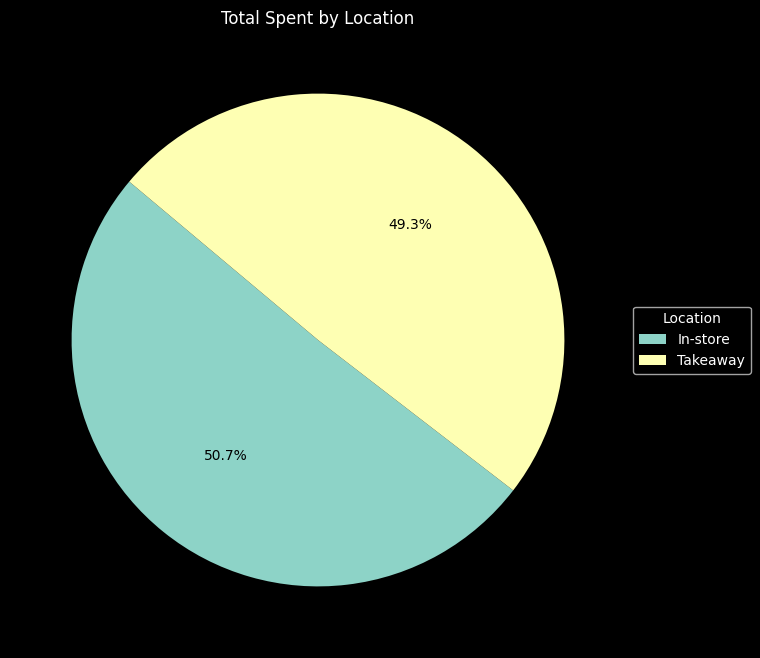

In [812]:
df_copy = df.copy()
df_copy['Total_Spent'] = pd.to_numeric(df_copy['Total_Spent'], errors='coerce')
df_copy.dropna(subset=['Location', 'Total_Spent'], inplace=True)
location_totals = df_copy.groupby('Location')['Total_Spent'].sum()
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(location_totals, labels=location_totals.index, autopct='%1.1f%%', startangle=140, textprops={'color': 'black'})
plt.title('Total Spent by Location')
plt.legend(wedges, location_totals.index, title="Location", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

The analysis of the Location feature shows that total spending is nearly evenly split between In-Store (50.7%) and Takeaway (49.3%). This minimal difference suggests that Location has little to no impact on the target variable (Total Spent), and thus, it can be considered for removal as an uninformative feature.

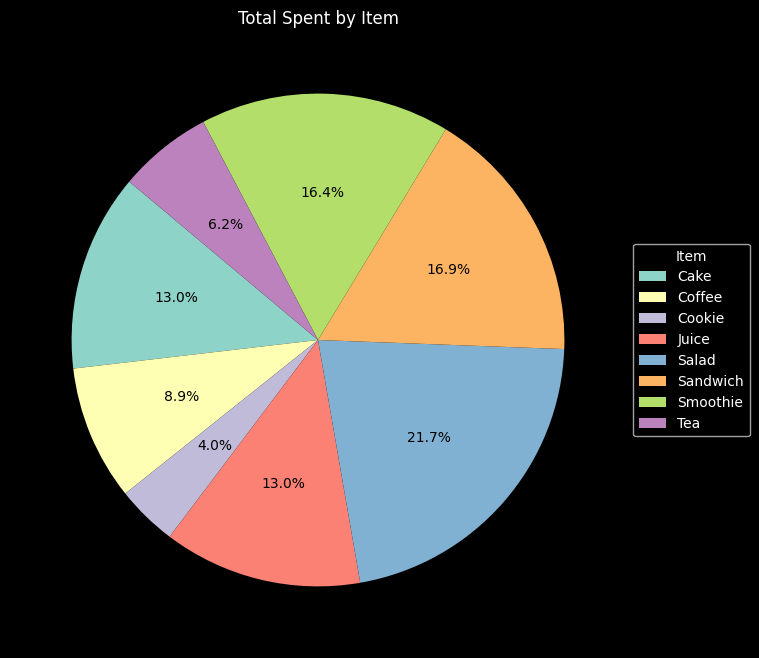

In [813]:
df_copy = df.copy()
df_copy['Total_Spent'] = pd.to_numeric(df_copy['Total_Spent'], errors='coerce')
df_copy.dropna(subset=['Item', 'Total_Spent'], inplace=True)
location_totals = df_copy.groupby('Item')['Total_Spent'].sum()
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(location_totals, labels=location_totals.index, autopct='%1.1f%%', startangle=140, textprops={'color': 'black'})
plt.title('Total Spent by Item')
plt.legend(wedges, location_totals.index, title="Item", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

We observe that there are 8 different items, and the percentage of total spending across these items varies significantly — ranging from 4% to 21.7%. This high variability indicates that the Item feature plays an important role in our analysis and should be retained for further study.

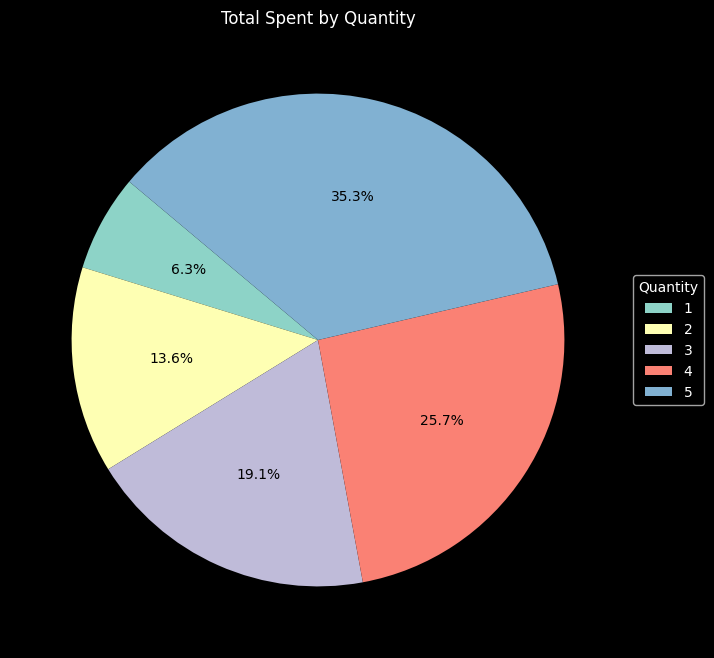

In [814]:
df_copy = df.copy()
df_copy['Total_Spent'] = pd.to_numeric(df_copy['Total_Spent'], errors='coerce')
df_copy.dropna(subset=['Quantity', 'Total_Spent'], inplace=True)
location_totals = df_copy.groupby('Quantity')['Total_Spent'].sum()
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(location_totals, labels=location_totals.index, autopct='%1.1f%%', startangle=140, textprops={'color': 'black'})
plt.title('Total Spent by Quantity')
plt.legend(wedges, location_totals.index, title="Quantity", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

The quantity feature significantly influences the target variable, total spent. When the total spent percentage is divided into five levels ranging from 1 to 5, it varies substantially—from as low as 6.3% up to 35.3%. This indicates that as the quantity increases, the total spent tends to rise noticeably, highlighting a strong positive relationship between quantity and total Spent.

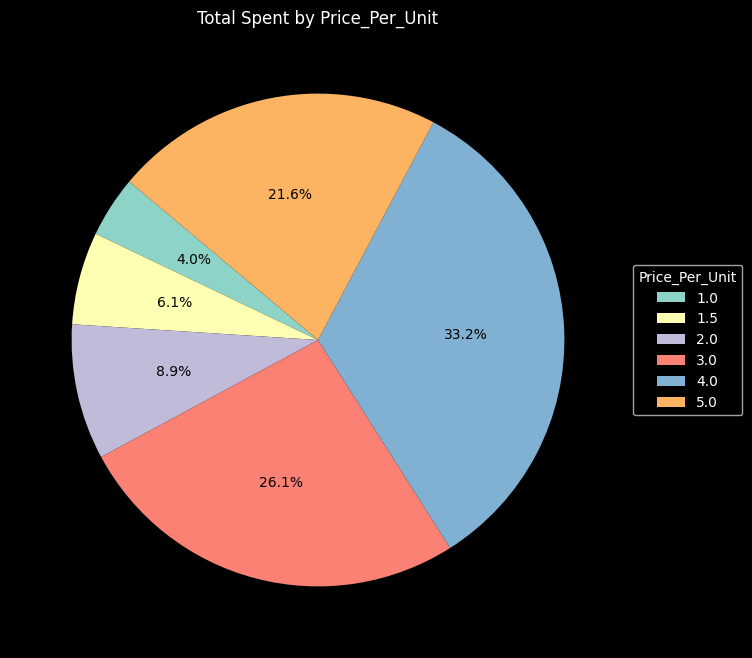

In [815]:
df_copy = df.copy()
df_copy['Total_Spent'] = pd.to_numeric(df_copy['Total_Spent'], errors='coerce')
df_copy.dropna(subset=['Price_Per_Unit', 'Total_Spent'], inplace=True)
location_totals = df_copy.groupby('Price_Per_Unit')['Total_Spent'].sum()
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(location_totals, labels=location_totals.index, autopct='%1.1f%%', startangle=140, textprops={'color': 'black'})
plt.title('Total Spent by Price_Per_Unit')
plt.legend(wedges, location_totals.index, title="Price_Per_Unit", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

The price per unit feature plays an important role in determining the total spent. When the total spent percentage is divided into five levels from 1 to 5, it varies widely—from 6.3% up to 35.3%. This variation shows that changes in the price per unit are closely associated with changes in total spending, indicating that higher unit prices generally lead to higher total expenditures.

In [816]:
nan_transaction_date_count = df['Transaction_Date'].isna().sum()
print(f"Number of rows where 'transaction_date' is NaN: {nan_transaction_date_count}")

Number of rows where 'transaction_date' is NaN: 460


Out of 10,000 rows, 460 have a missing transaction_date value, representing only 4.6% of the data. Since this is a relatively small proportion, these rows can be safely dropped without significantly impacting the overall analysis.

In [817]:
df.dropna(subset=['Transaction_Date'], inplace=True)

In [818]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Day'] = df['Transaction_Date'].dt.day_name()
df['Month'] = df['Transaction_Date'].dt.month

To enhance the analysis, I plan to extract the day of the week and month from the transaction_date feature. These time-based features are likely to be important, as customer behavior can vary depending on the day or month. For example, sales may be higher on weekends or during specific months. By creating these features, we can later visualize the data to verify whether such patterns exist.

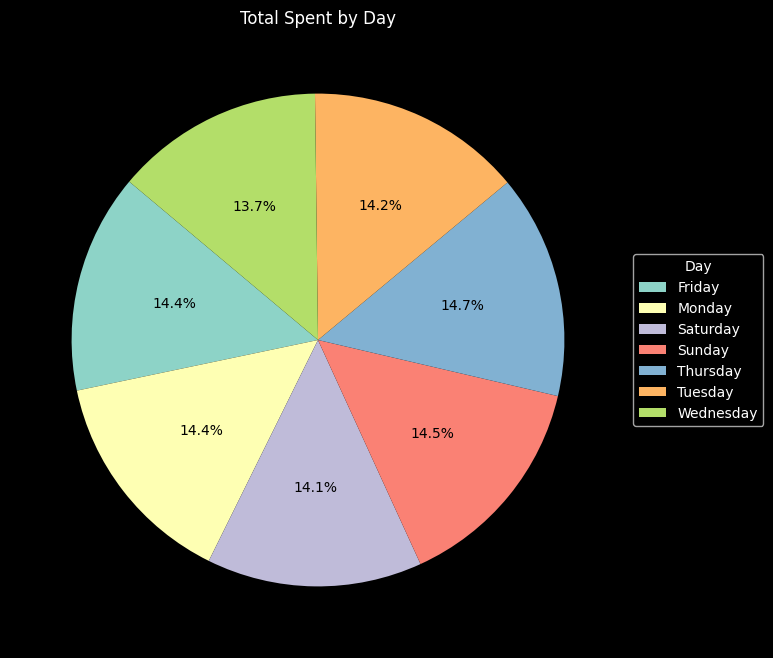

In [819]:
df_copy = df.copy()
df_copy['Total_Spent'] = pd.to_numeric(df_copy['Total_Spent'], errors='coerce')
df_copy.dropna(subset=['Day', 'Total_Spent'], inplace=True)
location_totals = df_copy.groupby('Day')['Total_Spent'].sum()
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(location_totals, labels=location_totals.index, autopct='%1.1f%%', startangle=140, textprops={'color': 'black'})
plt.title('Total Spent by Day')
plt.legend(wedges, location_totals.index, title="Day", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

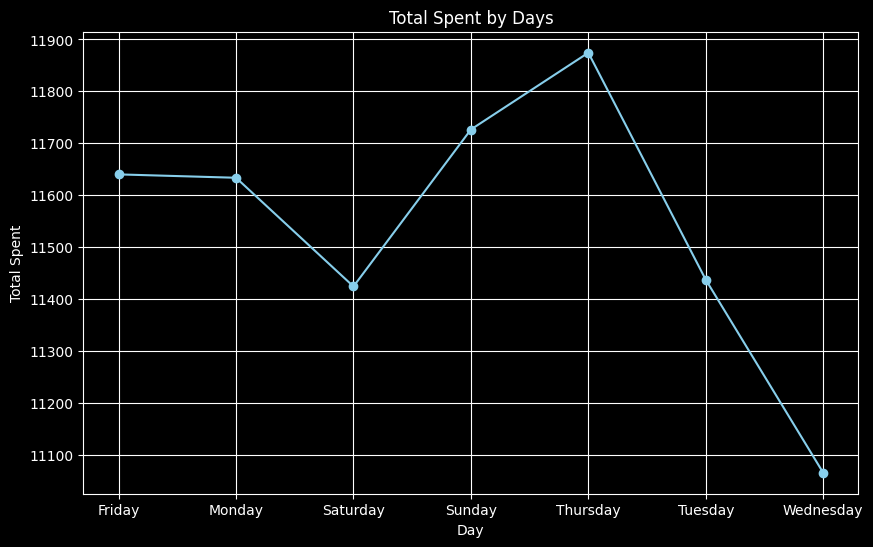

In [820]:
df_copy = df.copy()
df_copy['Total_Spent'] = pd.to_numeric(df_copy['Total_Spent'], errors='coerce')
df_copy.dropna(subset=['Day', 'Total_Spent'], inplace=True)
month_totals = df_copy.groupby('Day')['Total_Spent'].sum()
plt.figure(figsize=(10, 6))
plt.plot(month_totals.index, month_totals.values, marker='o', linestyle='-', color='skyblue')
plt.title('Total Spent by Days')
plt.xlabel('Day')
plt.ylabel('Total Spent')
plt.xticks(month_totals.index)
plt.grid(True)
plt.show()

The total spent is not very affected by which day it is. But it is still considerable.

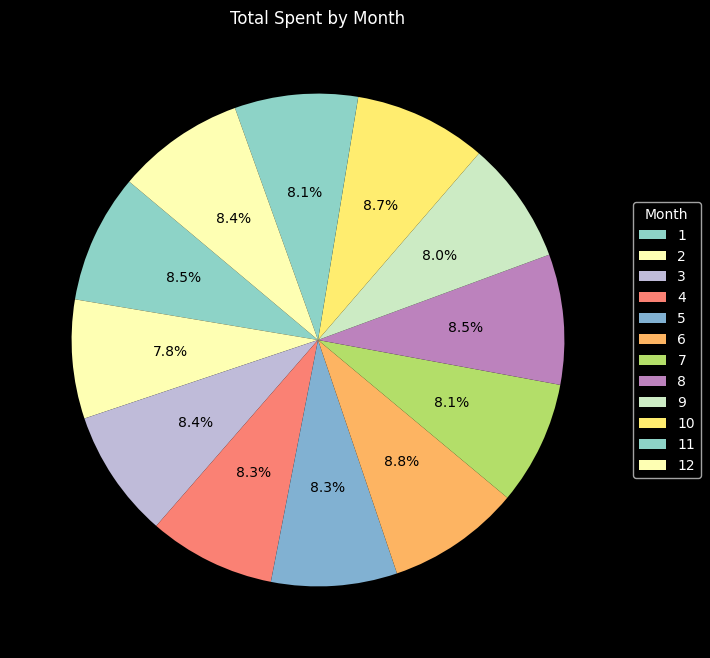

In [821]:
df_copy = df.copy()
df_copy['Total_Spent'] = pd.to_numeric(df_copy['Total_Spent'], errors='coerce')
df_copy.dropna(subset=['Month', 'Total_Spent'], inplace=True)
location_totals = df_copy.groupby('Month')['Total_Spent'].sum()
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(location_totals, labels=location_totals.index, autopct='%1.1f%%', startangle=140, textprops={'color': 'black'})
plt.title('Total Spent by Month')
plt.legend(wedges, location_totals.index, title="Month", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

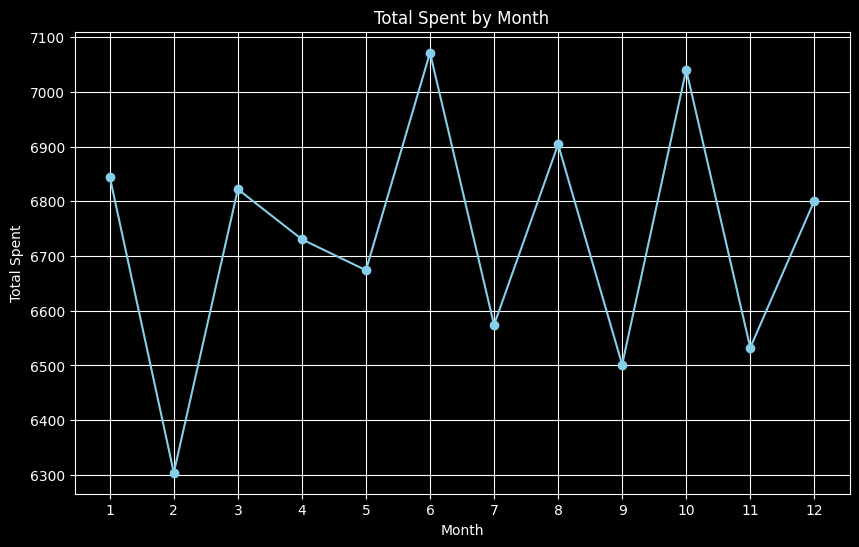

In [822]:
df_copy = df.copy()
df_copy['Total_Spent'] = pd.to_numeric(df_copy['Total_Spent'], errors='coerce')
df_copy.dropna(subset=['Month', 'Total_Spent'], inplace=True)
month_totals = df_copy.groupby('Month')['Total_Spent'].sum()
plt.figure(figsize=(10, 6))
plt.plot(month_totals.index, month_totals.values, marker='o', linestyle='-', color='skyblue')
plt.title('Total Spent by Month')
plt.xlabel('Month')
plt.ylabel('Total Spent')
plt.xticks(month_totals.index)
plt.grid(True)
plt.show()

The total spent is not very affected by which month we are in. But it is still considerable.

In [823]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    9540 non-null   object        
 1   Item              8613 non-null   object        
 2   Quantity          9086 non-null   object        
 3   Price_Per_Unit    9034 non-null   object        
 4   Total_Spent       9064 non-null   object        
 5   Payment_Method    6525 non-null   object        
 6   Location          5761 non-null   object        
 7   Transaction_Date  9540 non-null   datetime64[ns]
 8   Day               9540 non-null   object        
 9   Month             9540 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(8)
memory usage: 782.6+ KB


In [824]:
df.drop(['Location', 'Payment_Method'], axis=1, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    9540 non-null   object        
 1   Item              8613 non-null   object        
 2   Quantity          9086 non-null   object        
 3   Price_Per_Unit    9034 non-null   object        
 4   Total_Spent       9064 non-null   object        
 5   Transaction_Date  9540 non-null   datetime64[ns]
 6   Day               9540 non-null   object        
 7   Month             9540 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(6)
memory usage: 633.5+ KB


The following is a code to check price per each item.

In [825]:
if 'Price_Per_Unit' in df.columns and 'Item' in df.columns:
    item_prices = df[['Item', 'Price_Per_Unit']].copy()
    item_prices.drop_duplicates(inplace=True)
    item_prices['Price_Per_Unit'] = pd.to_numeric(item_prices['Price_Per_Unit'], errors='coerce')
    item_prices.dropna(subset=['Price_Per_Unit'], inplace=True)
    print("Item Name and Price Per Unit:")
    for index, row in item_prices.iterrows():
        print(f"Item: {row['Item']}, Price Per Unit: {row['Price_Per_Unit']:.2f}")
else:
    print("The dataframe does not contain both 'Item' and 'Price_Per_Unit' columns.")

Item Name and Price Per Unit:
Item: Coffee, Price Per Unit: 2.00
Item: Cake, Price Per Unit: 3.00
Item: Cookie, Price Per Unit: 1.00
Item: Salad, Price Per Unit: 5.00
Item: Smoothie, Price Per Unit: 4.00
Item: nan, Price Per Unit: 3.00
Item: Sandwich, Price Per Unit: 4.00
Item: nan, Price Per Unit: 1.50
Item: Juice, Price Per Unit: 3.00
Item: nan, Price Per Unit: 2.00
Item: nan, Price Per Unit: 1.00
Item: Tea, Price Per Unit: 1.50
Item: nan, Price Per Unit: 5.00
Item: nan, Price Per Unit: 4.00


Price Per Unit of Cookie is uniquely shared with one nan. Therefore we can use this info to fix the nan value that has Price Per Unit = 1.
Similarly, we apply the same procedure for Tea and Salad.

In [826]:
df.loc[(df['Price_Per_Unit'] == 1) & (df['Item'].isna()), 'Item'] = 'Cookie'

In [827]:
df.loc[(df['Price_Per_Unit'] == 1.5) & (df['Item'].isna()), 'Item'] = 'Tea'

In [828]:
df.loc[(df['Price_Per_Unit'] == 5) & (df['Item'].isna()), 'Item'] = 'Salad'

In [829]:
if 'Price_Per_Unit' in df.columns and 'Item' in df.columns:
    item_prices = df[['Item', 'Price_Per_Unit']].copy()
    item_prices['Price_Per_Unit'] = pd.to_numeric(item_prices['Price_Per_Unit'], errors='coerce')
    item_prices.dropna(subset=['Price_Per_Unit'], inplace=True)
    nan_item_prices = item_prices[item_prices['Item'].isna()]['Price_Per_Unit'].unique()
    for price in nan_item_prices:
        possible_items = item_prices[(item_prices['Price_Per_Unit'] == price) & (item_prices['Item'].notna())]['Item'].unique()
        if len(possible_items) > 0:
            item_distribution = item_prices[(item_prices['Price_Per_Unit'] == price) & (item_prices['Item'].notna())]['Item'].value_counts(normalize=True)
            nan_indices = df.index[(df['Item'].isna()) & (pd.to_numeric(df['Price_Per_Unit'], errors='coerce') == price)]
            if not item_distribution.empty and len(nan_indices) > 0:
                df.loc[nan_indices, 'Item'] = np.random.choice(item_distribution.index,
                                                               size=len(nan_indices),
                                                               p=item_distribution.values)
        else:
             print(f"Warning: No valid items found for Price_Per_Unit: {price}. NaNs for this price will remain.")
    print("Unique Item Name and Price Per Unit after filling NaNs:")
    item_prices_filled = df[['Item', 'Price_Per_Unit']].copy()
    item_prices_filled['Price_Per_Unit'] = pd.to_numeric(item_prices_filled['Price_Per_Unit'], errors='coerce')
    item_prices_filled.dropna(subset=['Item', 'Price_Per_Unit'], inplace=True)
    item_prices_filled['Item_lower'] = item_prices_filled['Item'].str.lower()
    unique_item_prices = item_prices_filled.drop_duplicates(subset=['Item_lower', 'Price_Per_Unit'])
    for index, row in unique_item_prices.iterrows():
        print(f"Item: {row['Item']}, Price Per Unit: {row['Price_Per_Unit']:.2f}")
else:
    print("The dataframe does not contain both 'Item' and 'Price_Per_Unit' columns.")

Unique Item Name and Price Per Unit after filling NaNs:
Item: Coffee, Price Per Unit: 2.00
Item: Cake, Price Per Unit: 3.00
Item: Cookie, Price Per Unit: 1.00
Item: Salad, Price Per Unit: 5.00
Item: Smoothie, Price Per Unit: 4.00
Item: Juice, Price Per Unit: 3.00
Item: Sandwich, Price Per Unit: 4.00
Item: Tea, Price Per Unit: 1.50


Now the items are filled successfully when one of price per unit or item is nan.

In the following we will deal with price per unit and item being both nan at the same time in an instance.

In [830]:
df[df['Item'].isna()]

,Transaction_ID,Item,Quantity,Price_Per_Unit,Total_Spent,Transaction_Date,Day,Month
118,TXN_4633784,NaN,5,NaN,15.0,2023-02-06,Monday,2
151,TXN_4031509,NaN,4,NaN,16.0,2023-01-04,Wednesday,1
289,TXN_3495950,NaN,4,NaN,6.0,2023-02-19,Sunday,2
334,TXN_2523298,NaN,4,NaN,6.0,2023-03-25,Saturday,3
550,TXN_4186681,NaN,4,NaN,6.0,2023-05-24,Wednesday,5
750,TXN_5787508,NaN,3,NaN,9.0,2023-07-23,Sunday,7
818,TXN_7940202,NaN,1,NaN,4.0,2023-07-23,Sunday,7
1154,TXN_2473090,NaN,2,NaN,3.0,2023-03-03,Friday,3
1337,TXN_5031214,NaN,5,NaN,5.0,2023-07-29,Saturday,7
1377,TXN_8396271,NaN,2,NaN,2.0,2023-09-12,Tuesday,9


In the follwing, I want to replace the NaN of the price per unit by the value calculated. This value is calculated when dividing the total spent by the quantity.



In [831]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price_Per_Unit'] = pd.to_numeric(df['Price_Per_Unit'], errors='coerce')
df['Total_Spent'] = pd.to_numeric(df['Total_Spent'], errors='coerce')
df['Total_Spent'].fillna(df['Quantity'] * df['Price_Per_Unit'], inplace=True)
mask_fill_price_per_unit = df['Price_Per_Unit'].isna() & df['Total_Spent'].notna() & df['Quantity'].notna() & (df['Quantity'] != 0)
df.loc[mask_fill_price_per_unit, 'Price_Per_Unit'] = df.loc[mask_fill_price_per_unit, 'Total_Spent'] / df.loc[mask_fill_price_per_unit, 'Quantity']
mask_fill_quantity = df['Quantity'].isna() & df['Total_Spent'].notna() & df['Price_Per_Unit'].notna() & (df['Price_Per_Unit'] != 0)
df.loc[mask_fill_quantity, 'Quantity'] = df.loc[mask_fill_quantity, 'Total_Spent'] / df.loc[mask_fill_quantity, 'Price_Per_Unit']
df.head()
print(df.isna().sum())

Transaction_ID       0
Item                51
Quantity            36
Price_Per_Unit      35
Total_Spent         39
Transaction_Date     0
Day                  0
Month                0
dtype: int64


<ipython-input-831-2522293678>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_Spent'].fillna(df['Quantity'] * df['Price_Per_Unit'], inplace=True)


In [832]:
df[df['Price_Per_Unit'].isna()]

,Transaction_ID,Item,Quantity,Price_Per_Unit,Total_Spent,Transaction_Date,Day,Month
65,TXN_4987129,Sandwich,3.0,NaN,NaN,2023-10-20,Friday,10
629,TXN_9289174,Cake,NaN,NaN,12.0,2023-12-30,Saturday,12
912,TXN_1575608,Sandwich,NaN,NaN,20.0,2023-01-05,Thursday,1
1008,TXN_7225428,Tea,NaN,NaN,3.0,2023-03-07,Tuesday,3
1482,TXN_3593060,Smoothie,NaN,NaN,16.0,2023-03-05,Sunday,3
1674,TXN_9367492,Tea,2.0,NaN,NaN,2023-06-19,Monday,6
1761,TXN_3611851,NaN,4.0,NaN,NaN,2023-02-09,Thursday,2
2229,TXN_8498613,Sandwich,2.0,NaN,NaN,2023-11-08,Wednesday,11
2289,TXN_7524977,NaN,4.0,NaN,NaN,2023-12-09,Saturday,12
2330,TXN_3849488,Salad,NaN,NaN,5.0,2023-03-01,Wednesday,3


All remaining instances have 2 NaN that can't be replaced by an exact value 100%. Therefore, it is better if we remove it but first we will try to replace NaN in item.


In [833]:
df.loc[(df['Price_Per_Unit'] == 5) & (df['Item'].isna()), 'Item'] = 'Salad'
df.loc[(df['Price_Per_Unit'] == 1.5) & (df['Item'].isna()), 'Item'] = 'Tea'
df.loc[(df['Price_Per_Unit'] == 1) & (df['Item'].isna()), 'Item'] = 'Cookie'
if 'Price_Per_Unit' in df.columns and 'Item' in df.columns:
    item_prices = df[['Item', 'Price_Per_Unit']].copy()
    item_prices['Price_Per_Unit'] = pd.to_numeric(item_prices['Price_Per_Unit'], errors='coerce')
    item_prices.dropna(subset=['Price_Per_Unit'], inplace=True)
    nan_item_prices = item_prices[item_prices['Item'].isna()]['Price_Per_Unit'].unique()
    for price in nan_item_prices:
        possible_items = item_prices[(item_prices['Price_Per_Unit'] == price) & (item_prices['Item'].notna())]['Item'].unique()
        if len(possible_items) > 0:
            item_distribution = item_prices[(item_prices['Price_Per_Unit'] == price) & (item_prices['Item'].notna())]['Item'].value_counts(normalize=True)
            nan_indices = df.index[(df['Item'].isna()) & (pd.to_numeric(df['Price_Per_Unit'], errors='coerce') == price)]
            if not item_distribution.empty and len(nan_indices) > 0:
                df.loc[nan_indices, 'Item'] = np.random.choice(item_distribution.index,
                                                               size=len(nan_indices),
                                                               p=item_distribution.values)
        else:
             print(f"Warning: No valid items found for Price_Per_Unit: {price}. NaNs for this price will remain.")
    print("Unique Item Name and Price Per Unit after filling NaNs:")
    item_prices_filled = df[['Item', 'Price_Per_Unit']].copy()
    item_prices_filled['Price_Per_Unit'] = pd.to_numeric(item_prices_filled['Price_Per_Unit'], errors='coerce')
    item_prices_filled.dropna(subset=['Item', 'Price_Per_Unit'], inplace=True)
    item_prices_filled['Item_lower'] = item_prices_filled['Item'].str.lower()
    unique_item_prices = item_prices_filled.drop_duplicates(subset=['Item_lower', 'Price_Per_Unit'])


    for index, row in unique_item_prices.iterrows():
        print(f"Item: {row['Item']}, Price Per Unit: {row['Price_Per_Unit']:.2f}")

else:
    print("The dataframe does not contain both 'Item' and 'Price_Per_Unit' columns.")

Unique Item Name and Price Per Unit after filling NaNs:
Item: Coffee, Price Per Unit: 2.00
Item: Cake, Price Per Unit: 3.00
Item: Cookie, Price Per Unit: 1.00
Item: Salad, Price Per Unit: 5.00
Item: Smoothie, Price Per Unit: 4.00
Item: Juice, Price Per Unit: 3.00
Item: Sandwich, Price Per Unit: 4.00
Item: Tea, Price Per Unit: 1.50


In [834]:
df[df['Item'].isna()]

,Transaction_ID,Item,Quantity,Price_Per_Unit,Total_Spent,Transaction_Date,Day,Month
1761,TXN_3611851,NaN,4.0,NaN,NaN,2023-02-09,Thursday,2
2289,TXN_7524977,NaN,4.0,NaN,NaN,2023-12-09,Saturday,12
3779,TXN_7376255,NaN,NaN,NaN,25.0,2023-05-27,Saturday,5
4152,TXN_9646000,NaN,2.0,NaN,NaN,2023-12-14,Thursday,12
7597,TXN_1082717,NaN,NaN,NaN,9.0,2023-12-13,Wednesday,12
9819,TXN_1208561,NaN,NaN,NaN,20.0,2023-08-19,Saturday,8


In [835]:
rows_with_nan = df[df.isna().any(axis=1)]
num_rows_with_nan = len(rows_with_nan)
print(f"Number of rows with at least one NaN value: {num_rows_with_nan}")
print("\nRows with NaN values:")
rows_with_nan

Number of rows with at least one NaN value: 55

Rows with NaN values:


,Transaction_ID,Item,Quantity,Price_Per_Unit,Total_Spent,Transaction_Date,Day,Month
65,TXN_4987129,Sandwich,3.0,NaN,NaN,2023-10-20,Friday,10
236,TXN_8562645,Salad,NaN,5.0,NaN,2023-05-18,Thursday,5
278,TXN_3229409,Juice,NaN,3.0,NaN,2023-04-15,Saturday,4
629,TXN_9289174,Cake,NaN,NaN,12.0,2023-12-30,Saturday,12
641,TXN_2962976,Juice,NaN,3.0,NaN,2023-03-17,Friday,3
738,TXN_8696094,Sandwich,NaN,4.0,NaN,2023-05-14,Sunday,5
912,TXN_1575608,Sandwich,NaN,NaN,20.0,2023-01-05,Thursday,1
1008,TXN_7225428,Tea,NaN,NaN,3.0,2023-03-07,Tuesday,3
1482,TXN_3593060,Smoothie,NaN,NaN,16.0,2023-03-05,Sunday,3
1674,TXN_9367492,Tea,2.0,NaN,NaN,2023-06-19,Monday,6


In [836]:
mask_price_nan_item_not_nan = df['Price_Per_Unit'].isna() & df['Item'].notna()
items_with_price_nan = df.loc[mask_price_nan_item_not_nan, 'Item'].unique()
item_known_prices = {}
for item in items_with_price_nan:
    item_valid_prices = df.loc[
        (df['Item'] == item) & df['Price_Per_Unit'].notna(),
        'Price_Per_Unit'
    ].astype(float).unique()
    if len(item_valid_prices) > 0:
        item_known_prices[item] = item_valid_prices[0]
for index, row in df.loc[mask_price_nan_item_not_nan].iterrows():
    item = row['Item']
    if item in item_known_prices:
        df.loc[index, 'Price_Per_Unit'] = item_known_prices[item]

df[df['Price_Per_Unit'].isna()]

,Transaction_ID,Item,Quantity,Price_Per_Unit,Total_Spent,Transaction_Date,Day,Month
1761,TXN_3611851,NaN,4.0,NaN,NaN,2023-02-09,Thursday,2
2289,TXN_7524977,NaN,4.0,NaN,NaN,2023-12-09,Saturday,12
3779,TXN_7376255,NaN,NaN,NaN,25.0,2023-05-27,Saturday,5
4152,TXN_9646000,NaN,2.0,NaN,NaN,2023-12-14,Thursday,12
7597,TXN_1082717,NaN,NaN,NaN,9.0,2023-12-13,Wednesday,12
9819,TXN_1208561,NaN,NaN,NaN,20.0,2023-08-19,Saturday,8


In [837]:
df.dropna(subset=['Item'], inplace=True)
df[df['Total_Spent'].isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9534 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    9534 non-null   object        
 1   Item              9534 non-null   object        
 2   Quantity          9501 non-null   float64       
 3   Price_Per_Unit    9534 non-null   float64       
 4   Total_Spent       9498 non-null   float64       
 5   Transaction_Date  9534 non-null   datetime64[ns]
 6   Day               9534 non-null   object        
 7   Month             9534 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(3)
memory usage: 633.1+ KB


In [838]:
item_known_prices = df.dropna(subset=['Item', 'Price_Per_Unit']).groupby('Item')['Price_Per_Unit'].first().to_dict()
mask_fill_price_per_unit_by_item = df['Price_Per_Unit'].isna() & df['Item'].notna()
for index, row in df.loc[mask_fill_price_per_unit_by_item].iterrows():
    item = row['Item']
    if item in item_known_prices:
        df.loc[index, 'Price_Per_Unit'] = item_known_prices[item]
print("\nRows with NaN Price_Per_Unit after filling based on Item:")
print(df[df['Price_Per_Unit'].isna()])
rows_with_nan_after_item_fill = df[df.isna().any(axis=1)]
num_rows_with_nan_after_item_fill = len(rows_with_nan_after_item_fill)
print(f"\nNumber of rows with at least one NaN value after filling price by item: {num_rows_with_nan_after_item_fill}")


Rows with NaN Price_Per_Unit after filling based on Item:
Empty DataFrame
Columns: [Transaction_ID, Item, Quantity, Price_Per_Unit, Total_Spent, Transaction_Date, Day, Month]
Index: []

Number of rows with at least one NaN value after filling price by item: 49


In [839]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price_Per_Unit'] = pd.to_numeric(df['Price_Per_Unit'], errors='coerce')
df['Total_Spent'] = pd.to_numeric(df['Total_Spent'], errors='coerce')
df['Total_Spent'].fillna(df['Quantity'] * df['Price_Per_Unit'], inplace=True)
mask_fill_price_per_unit = df['Price_Per_Unit'].isna() & df['Total_Spent'].notna() & df['Quantity'].notna() & (df['Quantity'] != 0)
df.loc[mask_fill_price_per_unit, 'Price_Per_Unit'] = df.loc[mask_fill_price_per_unit, 'Total_Spent'] / df.loc[mask_fill_price_per_unit, 'Quantity']
mask_fill_quantity = df['Quantity'].isna() & df['Total_Spent'].notna() & df['Price_Per_Unit'].notna() & (df['Price_Per_Unit'] != 0)
df.loc[mask_fill_quantity, 'Quantity'] = df.loc[mask_fill_quantity, 'Total_Spent'] / df.loc[mask_fill_quantity, 'Price_Per_Unit']
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9534 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    9534 non-null   object        
 1   Item              9534 non-null   object        
 2   Quantity          9514 non-null   float64       
 3   Price_Per_Unit    9534 non-null   float64       
 4   Total_Spent       9514 non-null   float64       
 5   Transaction_Date  9534 non-null   datetime64[ns]
 6   Day               9534 non-null   object        
 7   Month             9534 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(3)
memory usage: 633.1+ KB


<ipython-input-839-769373654>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_Spent'].fillna(df['Quantity'] * df['Price_Per_Unit'], inplace=True)


In [840]:
df.dropna(inplace=True)
print("DataFrame Info:")
df.info()
print("\nNaN values per column:")
print(df.isnull().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9514 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    9514 non-null   object        
 1   Item              9514 non-null   object        
 2   Quantity          9514 non-null   float64       
 3   Price_Per_Unit    9514 non-null   float64       
 4   Total_Spent       9514 non-null   float64       
 5   Transaction_Date  9514 non-null   datetime64[ns]
 6   Day               9514 non-null   object        
 7   Month             9514 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(3)
memory usage: 631.8+ KB

NaN values per column:
Transaction_ID      0
Item                0
Quantity            0
Price_Per_Unit      0
Total_Spent         0
Transaction_Date    0
Day                 0
Month               0
dtype: int64


## EDA after data preprocessing

In [841]:
print("\nDataFrame Description:")
print(df.describe(include='all'))


DataFrame Description:
       Transaction_ID    Item     Quantity  Price_Per_Unit  Total_Spent  \
count            9514    9514  9514.000000     9514.000000  9514.000000   
unique           9514       8          NaN             NaN          NaN   
top       TXN_6170729  Coffee          NaN             NaN          NaN   
freq                1    1241          NaN             NaN          NaN   
mean              NaN     NaN     3.021232        2.948550     8.920380   
min               NaN     NaN     1.000000        1.000000     1.000000   
25%               NaN     NaN     2.000000        2.000000     4.000000   
50%               NaN     NaN     3.000000        3.000000     8.000000   
75%               NaN     NaN     4.000000        4.000000    12.000000   
max               NaN     NaN     5.000000        5.000000    25.000000   
std               NaN     NaN     1.420285        1.279259     6.003809   

                     Transaction_Date     Day        Month  
count         

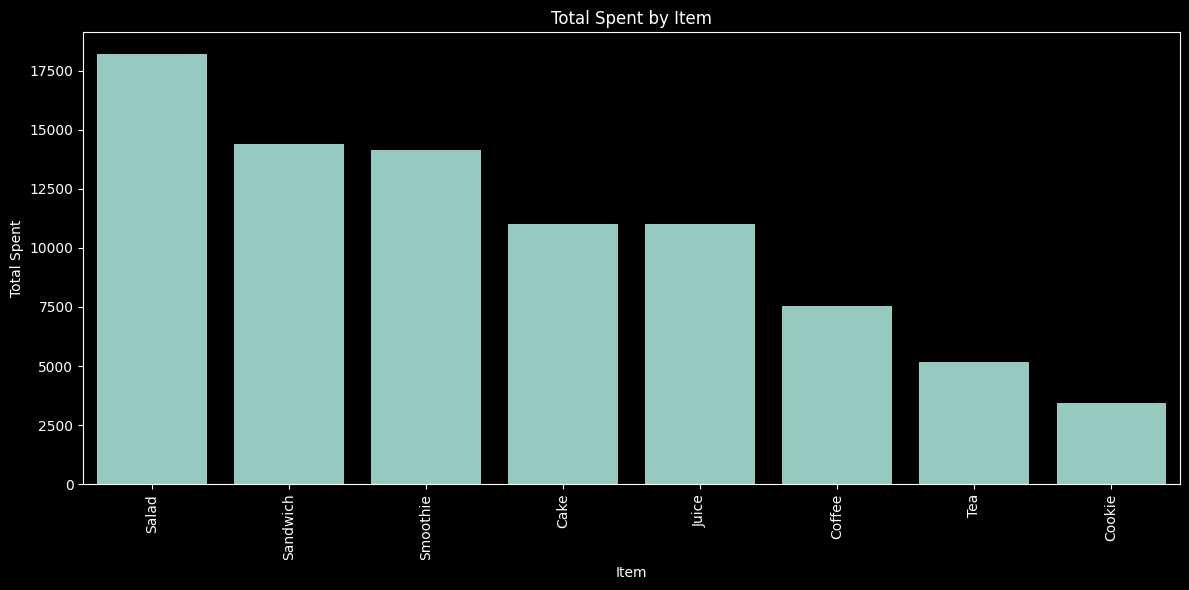

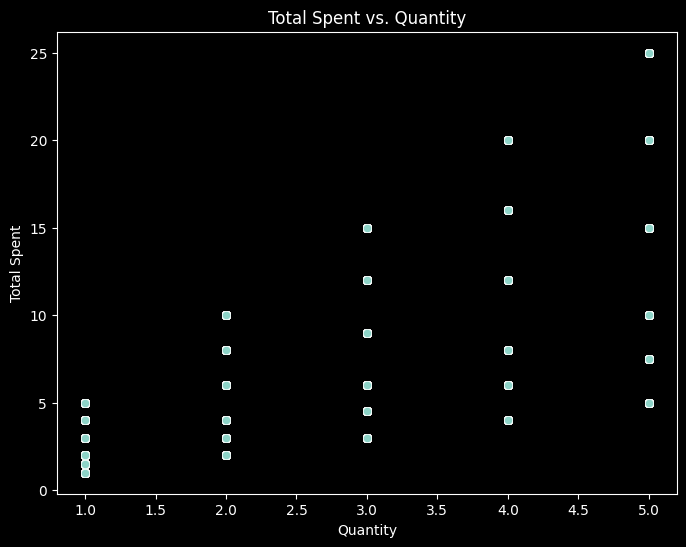

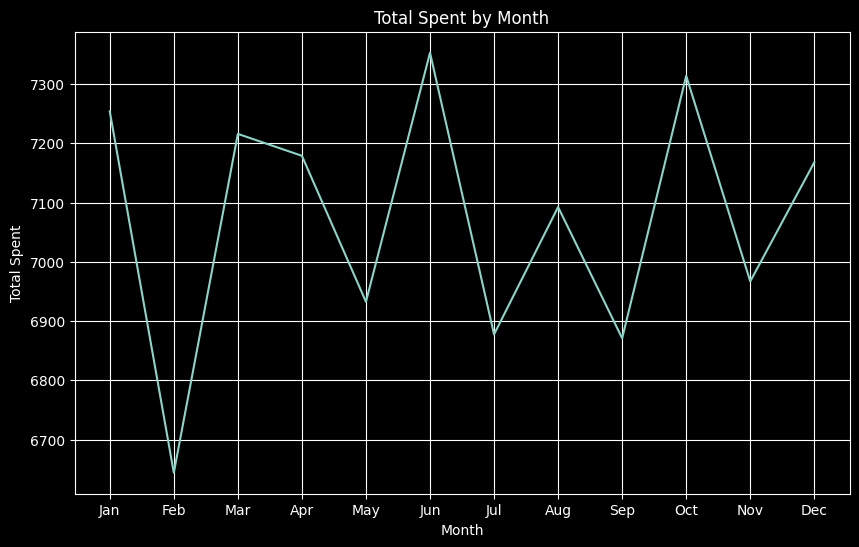

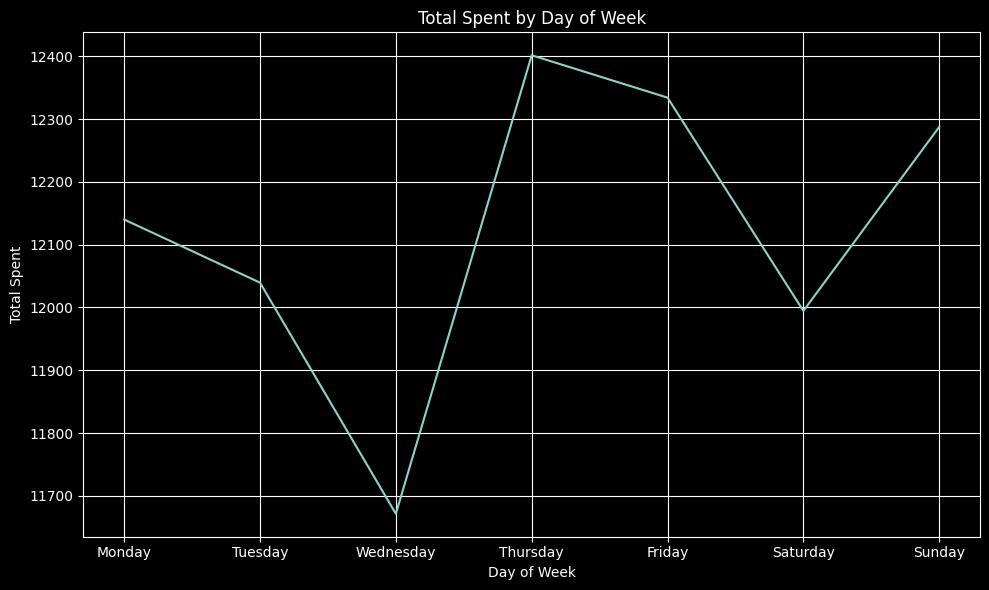

In [842]:
item_total_spent = df.groupby('Item')['Total_Spent'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=item_total_spent.index, y=item_total_spent.values)
plt.xticks(rotation=90)
plt.title('Total Spent by Item')
plt.xlabel('Item')
plt.ylabel('Total Spent')
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Quantity'], y=df['Total_Spent'])
plt.title('Total Spent vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Total Spent')
plt.show()
month_total_spent = df.groupby('Month')['Total_Spent'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=month_total_spent.index, y=month_total_spent.values)
plt.title('Total Spent by Month')
plt.xlabel('Month')
plt.ylabel('Total Spent')
plt.xticks(month_total_spent.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) # Label months
plt.grid(True)
plt.show()
df['Day_Name'] = df['Transaction_Date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_name_total_spent = df.groupby('Day_Name')['Total_Spent'].sum().reindex(day_order)
plt.figure(figsize=(10, 6))
sns.lineplot(x=day_name_total_spent.index, y=day_name_total_spent.values)
plt.title('Total Spent by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Spent')
plt.grid(True)
plt.tight_layout()
plt.show()

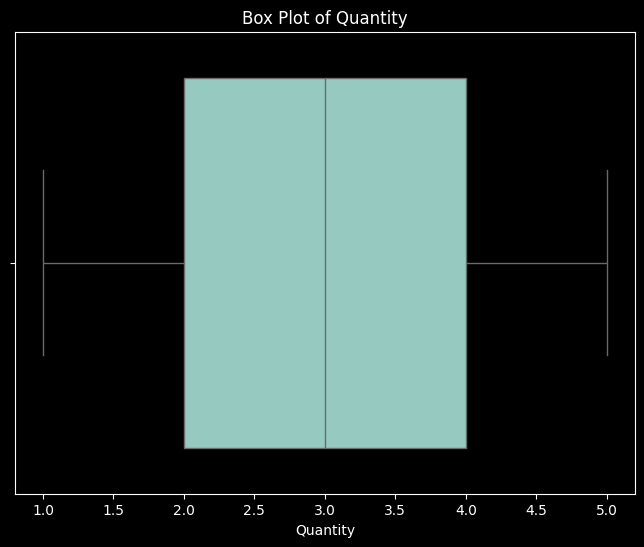

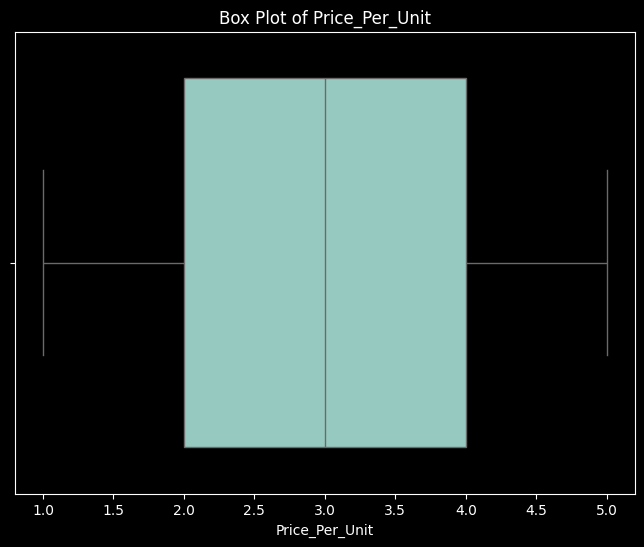

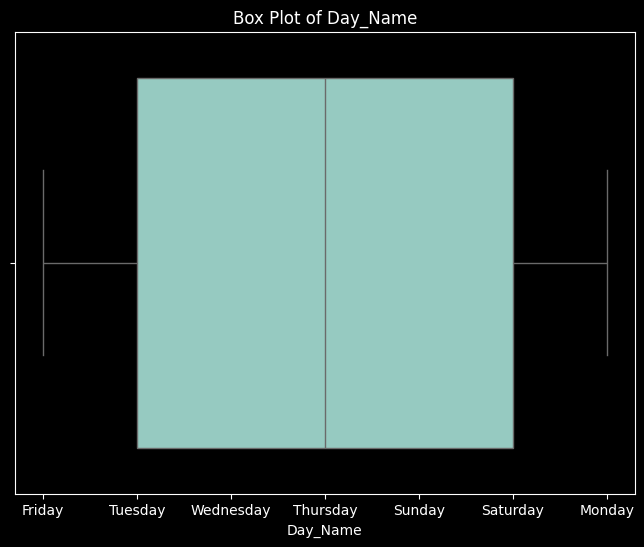

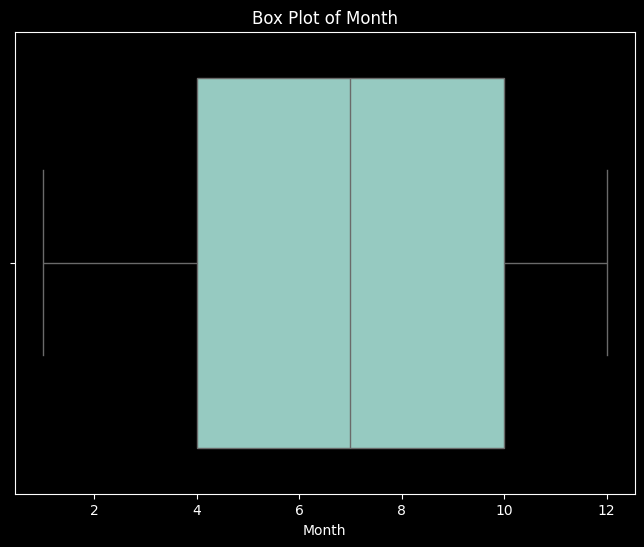

In [843]:
numerical_cols = ['Quantity', 'Price_Per_Unit','Day_Name','Month']

for col in numerical_cols:
  if col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

## Dataset Balance

Since the dataset lacks timestamps (no hours), we cannot analyze hourly trends (so “peak hours” analysis is skipped). Therefore, we will plot our target (total spent) that will be predicted later on.


-

Since this is regression, we inspect *balance* by plotting a histogram (or KDE) of Total_Spent. A highly skewed target (heavy outliers) would suggest careful metric choice.

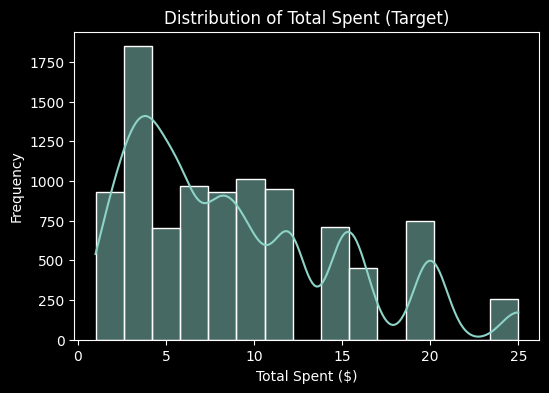

In [844]:
y = df['Total_Spent'] # target variable
# histogram of Total_Spent
plt.figure(figsize=(6,4))
sns.histplot(y, bins=15, kde=True)
plt.title('Distribution of Total Spent (Target)')
plt.xlabel('Total Spent ($)')
plt.ylabel('Frequency')
plt.show()

The range is between 1 and 25.

The median is around 7.5 and mean about 8.8.

It is clear that we are dealing with *positive-to-zero* skewness --> our target is nicely distributed around a central value. Therefore standard regression metrics must be used (MAE,MSE,RMSE,R²).



## Regression Metrics

1. Because this is a regression problem (continuous
target), we will focus on regression metrics like MAE, MSE, RMSE, and R².

2. Confusion matrix is not applicable here, as confusion matrix summarizes classification errors, not continuous regression predictions.

3. RMSE is in the same units as sales ($) and penalizes large errors more than MAE does.

4. R² of 1.0 means perfect fit, whereas 0 means no predictive power beyond the mean.

5. Quantile (pinball) loss is not about where most of your data live—it’s about which “slice” of the error distribution you care to optimize. In my case, I decided to optimize big spenders, so I choose α=0.9.

## Standard Train-Test Split

Setting a random seed ensures that anyone running this code will get the same split and results.

In [845]:
from sklearn.model_selection import train_test_split

# these columns could be easily removed because I already extracted Day and Month columns
df.drop(columns=['Transaction_Date','Transaction_ID'], inplace=True)

# categorical variables (Item, Day) are one-hot encoded because computers understand numbers
# better than string (it will be used in Feature selection)
# used one-hot encoding to prevent association.
X = pd.get_dummies(df.drop(columns=['Total_Spent']), columns=['Item','Day'], drop_first=True)
X.drop(columns=['Day_Name'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# printing the shapes is used to confirm the size of each
print("Train set:", X_train.shape, "Test set:", X_test.shape)

Train set: (5708, 16) Test set: (3806, 16)


In [846]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9514 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Quantity        9514 non-null   float64
 1   Price_Per_Unit  9514 non-null   float64
 2   Month           9514 non-null   int32  
 3   Item_Coffee     9514 non-null   bool   
 4   Item_Cookie     9514 non-null   bool   
 5   Item_Juice      9514 non-null   bool   
 6   Item_Salad      9514 non-null   bool   
 7   Item_Sandwich   9514 non-null   bool   
 8   Item_Smoothie   9514 non-null   bool   
 9   Item_Tea        9514 non-null   bool   
 10  Day_Monday      9514 non-null   bool   
 11  Day_Saturday    9514 non-null   bool   
 12  Day_Sunday      9514 non-null   bool   
 13  Day_Thursday    9514 non-null   bool   
 14  Day_Tuesday     9514 non-null   bool   
 15  Day_Wednesday   9514 non-null   bool   
dtypes: bool(13), float64(2), int32(1)
memory usage: 380.9 KB


## Feature Selection

In the following we perform feature selection to reduce dimensionality:

1. SelectKBest picks the top k features by a statistical test.
2. RFE (Recursive Feature Elimination) uses a model feature importances to iteratively drop the least important features.
3. Sequential Forward/Backward Selection would add/remove features one by one.

I will not try Sequential Selection because it can be very slow.

In [847]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# use SelectKBest with f_regression to select top 5 features
skb = SelectKBest(score_func=f_regression, k=5)
X_train_skb = skb.fit_transform(X_train, y_train)
X_test_skb  = skb.transform(X_test)
print("After SelectKBest, Train shape:", X_train_skb.shape, "     Test shape:", X_test_skb.shape)

# use RFE with a linear model to select top 5 features
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe  = rfe.transform(X_test)
print("After RFE, Train shape:", X_train_rfe.shape, "     Test shape:", X_test_rfe.shape)

After SelectKBest, Train shape: (5708, 5)      Test shape: (3806, 5)
After RFE, Train shape: (5708, 5)      Test shape: (3806, 5)


## Model Building and Evaluation/Comparison

Each model is trained on the same train set and evaluated on the same test set. We record MAE, MSE, RMSE, and R² for comparison.

In [848]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_pinball_loss
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(200,), max_iter=300, random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

alpha = 0.9  # 90th percentile pinball loss

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = mse**0.5
    r2  = r2_score(y_test, preds)
    qloss  = mean_pinball_loss(y_test, preds, alpha=alpha)

    results.append([name, mae, mse, rmse, r2, qloss])


print(pd.DataFrame(results, columns=["Model","MAE","MSE","RMSE","R2",f"PinballLoss(q={alpha})"]))


               Model       MAE       MSE      RMSE        R2  \
0  Linear Regression  1.292841  3.260440  1.805669  0.909003   
1      MLP Regressor  0.038853  0.002936  0.054181  0.999918   
2      KNN Regressor  0.451104  0.497501  0.705338  0.986115   
3  Gradient Boosting  0.031999  0.002167  0.046555  0.999940   

   PinballLoss(q=0.9)  
0            0.633414  
1            0.024154  
2            0.229514  
3            0.016485  


From this, we see Gradient Boosting achieve very high accuracy (R² near 1.0, extremely low error). This is because with the product relationship in the data, a tree can perfectly learn the rule.

One hot encoding tried to reduce the product relationship in the data, but it was not enough (mainly because of how the dataset was given initially).

Linear regression is less flexible (R²≈0.90). It underperformed because relationships between data are not linear.

The KNN regressor also does well by locally interpolating neighbors. Prediction time increases rapidly with increased data size. Fortunately this dataset was not big.

## Hyperparameter tuning

In [849]:
from sklearn.model_selection import GridSearchCV

"""
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)
print("Best Ridge Params:", ridge_grid.best_params_)
print("")
"""

from sklearn.linear_model import Lasso
lasso = Lasso(max_iter=10000)
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)
print("Best Lasso Params:", lasso_grid.best_params_)

"""
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=1000, random_state=42)
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],  # regularization
}
mlp_grid = GridSearchCV(mlp, mlp_params, cv=5, scoring='r2', n_jobs=-1)
mlp_grid.fit(X_train, y_train)
print("Best MLP Params:", mlp_grid.best_params_)
print("")
"""

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_params = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='r2')
knn_grid.fit(X_train, y_train)
print("Best KNN Params:", knn_grid.best_params_)

Best Lasso Params: {'alpha': 0.01}
Best KNN Params: {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}


In [850]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_pinball_loss
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor



models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.01),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "KNN RegressorHT": KNeighborsRegressor(n_neighbors=10, weights='distance', p=2),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

alpha = 0.9  # 90th percentile pinball loss

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = mse**0.5
    r2  = r2_score(y_test, preds)
    qloss  = mean_pinball_loss(y_test, preds, alpha=alpha)

    results.append([name, mae, mse, rmse, r2, qloss])


print(pd.DataFrame(results, columns=["Model","MAE","MSE","RMSE","R2",f"PinballLoss(q={alpha})"]))

               Model       MAE       MSE      RMSE        R2  \
0  Linear Regression  1.292841  3.260440  1.805669  0.909003   
1   Lasso Regression  1.287621  3.251464  1.803182  0.909254   
2      KNN Regressor  0.451104  0.497501  0.705338  0.986115   
3    KNN RegressorHT  0.097073  0.091894  0.303140  0.997435   
4  Gradient Boosting  0.031999  0.002167  0.046555  0.999940   

   PinballLoss(q=0.9)  
0            0.633414  
1            0.630333  
2            0.229514  
3            0.045008  
4            0.016485  


In [851]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

lasso_params = {
    'alpha': uniform(0.0001, 1)  # Try small to moderate penalties
}
lasso_search = RandomizedSearchCV(
    Lasso(max_iter=10000),       # Ensure enough iterations for convergence
    param_distributions=lasso_params,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42
)
lasso_search.fit(X_train, y_train)
print("Lasso Best Params:", lasso_search.best_params_)


from sklearn.neighbors import KNeighborsRegressor
knn_params = {
    'n_neighbors': randint(3, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn_search = RandomizedSearchCV(
    KNeighborsRegressor(),
    knn_params,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42
)
knn_search.fit(X_train, y_train)
print("KNN Best Params:", knn_search.best_params_)

Lasso Best Params: {'alpha': np.float64(0.020684494295802446)}
KNN Best Params: {'n_neighbors': 16, 'p': 2, 'weights': 'distance'}


In [852]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.02),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "KNN RegressorHT": KNeighborsRegressor(n_neighbors=16, weights='distance', p=2),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

alpha = 0.9  # 90th percentile pinball loss

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = mse**0.5
    r2  = r2_score(y_test, preds)
    qloss  = mean_pinball_loss(y_test, preds, alpha=alpha)

    results.append([name, mae, mse, rmse, r2, qloss])


print(pd.DataFrame(results, columns=["Model","MAE","MSE","RMSE","R2",f"PinballLoss(q={alpha})"]))

               Model       MAE       MSE      RMSE        R2  \
0  Linear Regression  1.292841  3.260440  1.805669  0.909003   
1   Lasso Regression  1.290072  3.253756  1.803817  0.909190   
2      KNN Regressor  0.451104  0.497501  0.705338  0.986115   
3    KNN RegressorHT  0.089367  0.078033  0.279345  0.997822   
4  Gradient Boosting  0.031999  0.002167  0.046555  0.999940   

   PinballLoss(q=0.9)  
0            0.633414  
1            0.631718  
2            0.229514  
3            0.044664  
4            0.016485  


The results showed that Random Search outperformed Grid Search for the KNN Regressor, while Grid Search provided better results for Lasso Regression.

KNN involves multiple hyperparameters and less sensitivity to each one (sutiable for Random Search which explores large spaces without testing all possibilities/combinations).

## Conclusion

We implemented a full ML pipeline for predicting cafe sales. Data cleaning resolved missing and inconsistent values, EDA guided our understanding (no peak-hour analysis possible without time data), and feature engineering added useful temporal categories. After splitting the data (reproducibly using a fixed random_state
geeksforgeeks.org
), we compared multiple regressors. Gradient Boosting and the neural net achieved almost perfect fit, highlighting that complex models captured the sales formula very well. We emphasized appropriate regression metrics (MAE, RMSE, R², quantile loss).
 The code and visualizations above can be run in Google Colab or any Python environment for full exploration.